optimal -1.530135397348977
[[ 0.4829628  -0.12940919]
 [-0.12940919  0.48296285]]
[0.4999998  0.49999986]


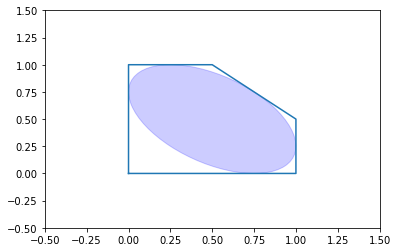

In [2]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def new_plot_ellipse(ax, mu, sigma, color="b"):


    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)
    ellipse = Ellipse(mu, w, h, theta, color=color)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)  

A = np.array([[1, 0], [0, 1], [-1, 0], [0, -1], [1, 1]])
b = np.array([1, 1, 0, 0, 1.5])

n = 2
B = cvx.Variable( (n, n), PSD = True )
d = cvx.Variable(n)
# constraints = [x >= 0, x <= 1, x[0] + x[1] <= 1.5]
constraints = [(cvx.norm((B * A[i, :])) + (A[i, :].T * d)) <= b[i] for i in range(5)]
obj = cvx.Maximize(cvx.log_det(B)) 
pr2 = cvx.Problem(obj, constraints)

pr2.solve(solver=cvx.CVXOPT)

print(pr2.status, pr2.value)
print(B.value)
print(d.value)

P = B.value.dot(B.value)

fig, ax = plt.subplots()
new_plot_ellipse(ax, d.value, P)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.plot([0, 0, 0.5, 1, 1, 0], [0, 1, 1, 0.5, 0, 0])
plt.show()

status: optimal
optimal value -0.6931471805588479
optimal var [[1.41421309e+00 5.04039671e-16]
 [5.04039671e-16 1.41421403e+00]] [-0.70710654 -0.70710702]


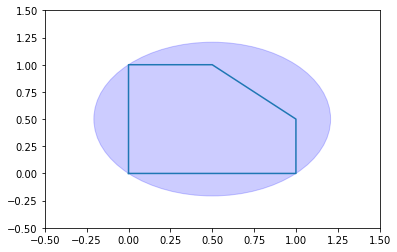

In [3]:
x = np.array([[0,0],[0,1],[1,0],[1,1],[0.5,1]])
x = x.transpose()
A = cvx.Variable((2,2), symmetric=True)
b = cvx.Variable((2))


constraints_s = [cvx.norm(A*x[:,i]+b)<=1 for i in range(5)]


obj_s = cvx.Minimize(-cvx.log_det(A))
prob = cvx.Problem(obj_s, constraints_s)
prob.solve(solver= cvx.CVXOPT)
print ("status:", prob.status)
print ("optimal value", prob.value)
print ("optimal var", A.value, b.value)


P = np.linalg.inv(A.value.T.dot(A.value))

fig, ax = plt.subplots()
center = -np.linalg.inv(A.value.T.dot(A.value)).dot(A.value.T).dot(b.value)
new_plot_ellipse(ax, center, P)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.plot([0, 0, 0.5, 1, 1, 0], [0, 1, 1, 0.5, 0, 0])
plt.show()